# Marketing Campaign Plan (Grocery Store)

###### Using this dataset around Coupons, you can quickly analyze marketing campaigns based on responses, revenue and other key metrics. Predict who will respond to which campaign, which channel they will use and why and thereby increase the likelihood of responses and quality of leads in future campaigns.

In [74]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

# 1 Get the Data

In [75]:
df = pd.read_csv('04 WA_Fn-UseC_-Marketing-Campaign-Plan_-GroceryS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 15 columns):
storeid           1496 non-null int64
HealthyStore      1496 non-null object
StoreSize         1496 non-null object
StoreLayout       1496 non-null object
customerID        1496 non-null object
gender            1496 non-null object
WhoShoppingFor    1496 non-null object
Vegetarian        1496 non-null object
ShoppingStyle     1496 non-null object
CouponUser        1496 non-null object
week              1496 non-null int64
CouponSequence    1496 non-null object
CarryOver         1496 non-null int64
CouponValue       1496 non-null object
AmountSpent       1496 non-null float64
dtypes: float64(1), int64(3), object(11)
memory usage: 175.4+ KB


In [76]:
def func_SS (x):
    if x=='Weekly; similar items': return 'Weekly'
    else: return'Biweekly + Often'
df['ShoppingStyle_bin'] = df['ShoppingStyle'].apply(func_SS)

In [77]:
def func_C (x):
    if x in ('From both','From mailings'): return 'Mails + Both'
    else: return 'Newspaper + No'
df['CouponUser_bin'] = df['CouponUser'].apply(func_C)

In [78]:
df = df[['HealthyStore','StoreSize','WhoShoppingFor','CouponValue','AmountSpent',
         'ShoppingStyle_bin','CouponUser_bin']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 7 columns):
HealthyStore         1496 non-null object
StoreSize            1496 non-null object
WhoShoppingFor       1496 non-null object
CouponValue          1496 non-null object
AmountSpent          1496 non-null float64
ShoppingStyle_bin    1496 non-null object
CouponUser_bin       1496 non-null object
dtypes: float64(1), object(6)
memory usage: 81.9+ KB


# 2a HealthyStore

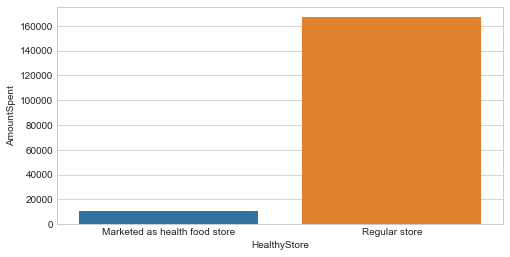

In [79]:
temp = pd.DataFrame(df.groupby(['HealthyStore'], axis=0, as_index=False)['AmountSpent'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="HealthyStore", y="AmountSpent",data=temp)

# 2b StoreSize

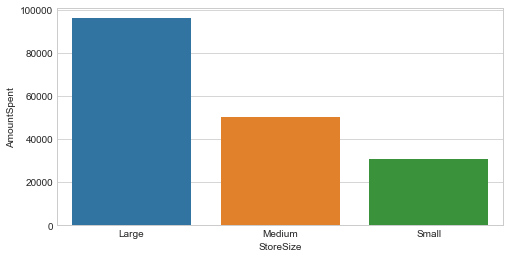

In [80]:
temp = pd.DataFrame(df.groupby(['StoreSize'], axis=0, as_index=False)['AmountSpent'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="StoreSize", y="AmountSpent",data=temp)

# 2c CouponValue

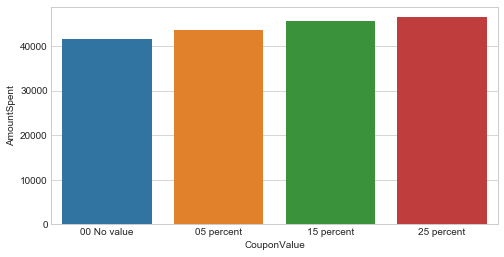

In [81]:
temp = pd.DataFrame(df.groupby(['CouponValue'], axis=0, as_index=False)['AmountSpent'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="CouponValue", y="AmountSpent",data=temp)

# 2d ShoppingStyle_bin

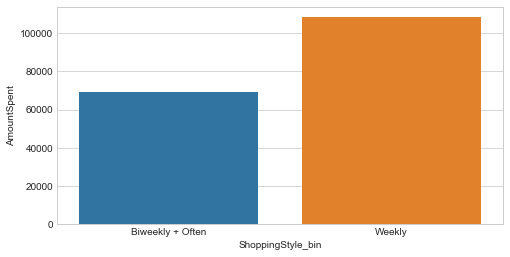

In [82]:
temp = pd.DataFrame(df.groupby(['ShoppingStyle_bin'], axis=0, as_index=False)['AmountSpent'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="ShoppingStyle_bin", y="AmountSpent",data=temp)

# 2e CouponUser_bin

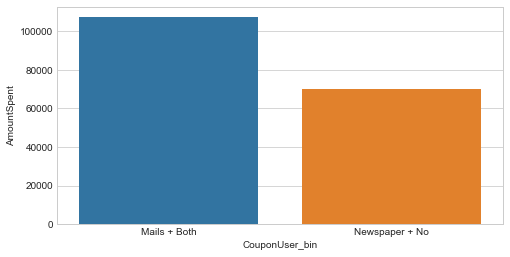

In [83]:
temp = pd.DataFrame(df.groupby(['CouponUser_bin'], axis=0, as_index=False)['AmountSpent'].sum())
plt.figure(figsize=(8,4))
sns.barplot(x="CouponUser_bin", y="AmountSpent",data=temp)

# 3 Train Test Split

In [84]:
df = df[df['AmountSpent'] > 50].copy()
df.dropna(inplace=True)
df.drop(['StoreSize','HealthyStore'],axis=1,inplace=True)

In [85]:
cat_feats = ['WhoShoppingFor','CouponValue','ShoppingStyle_bin','CouponUser_bin']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [86]:
x = final_data.drop(['AmountSpent'],axis=1)
y = final_data['AmountSpent']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# 4 Building the Model

In [87]:
x_train = sm.add_constant(x_train).copy()
lm_sm = sm.OLS(y_train, x_train)
est = lm_sm.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     116.1
Date:                Fri, 17 Nov 2017   Prob (F-statistic):          1.75e-122
Time:                        22:59:27   Log-Likelihood:                -4564.1
No. Observations:                 945   AIC:                             9144.
Df Residuals:                     937   BIC:                             9183.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# 5 Predictions and Evaluation

In [88]:
x_test = sm.add_constant(x_test).copy()
y_pred = est.predict(x_test)

print('BIAS:', round(np.mean(y_test - y_pred),2))
print('MAPE:', round(np.mean(np.absolute((y_test - y_pred)/y_test))*100,2), "%")

BIAS: 1.99
MAPE: 17.73 %
